<a href="https://colab.research.google.com/github/Bikash432/Bikash-Thapa-Magar/blob/master/MLproject_BreastCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Discription: Enhance the prediction of Breast cancer from the data by applying machine learning algorithms and various techniques.

In [ ]:
#import libraies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load the data
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('breastcancer.csv')


Saving breastcancer.csv to breastcancer.csv


In [ ]:
df1 = df.groupby('diagnosis')['radius_mean'].mean()

In [ ]:
print(df1)

diagnosis
B    12.146524
M    17.462830
Name: radius_mean, dtype: float64


In [ ]:
#Count the number of rows and columns in the data set
df.shape

(569, 32)

In [ ]:
#Count the number of empty (NaN, NAN, na) values in each column
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [22]:
#Drop the column with all missing values
df = df.dropna(axis=1)

In [23]:
#Get the new count of the number of rows and columns
df.shape

(569, 32)

In [ ]:
#Get a count of the number of Malignant (M) or Benign (B) cells
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

<Axes: xlabel='count', ylabel='diagnosis'>

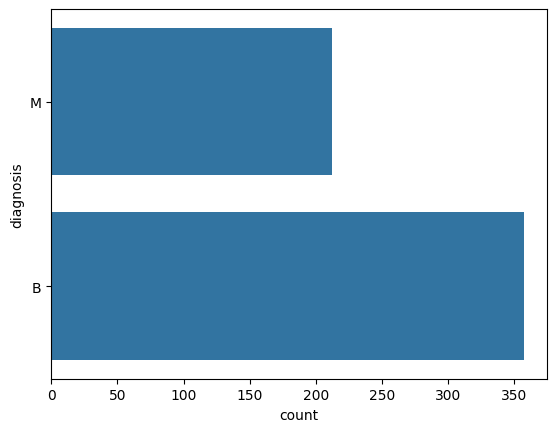

In [ ]:
#Visualize the count
sns.countplot(df['diagnosis'], label='count')

In [ ]:
#Look at the data types to see which columns need to be encoded
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [24]:
#Encode the categorical data values
from sklearn.preprocessing import LabelEncoder
laberencoder_Y = LabelEncoder()
df.iloc[:, 1] = laberencoder_Y.fit_transform(df.iloc[:,1].values) #B->0, M->1

<ipython-input-24-a65012469184>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, 1] = laberencoder_Y.fit_transform(df.iloc[:,1].values) #B->0, M->1


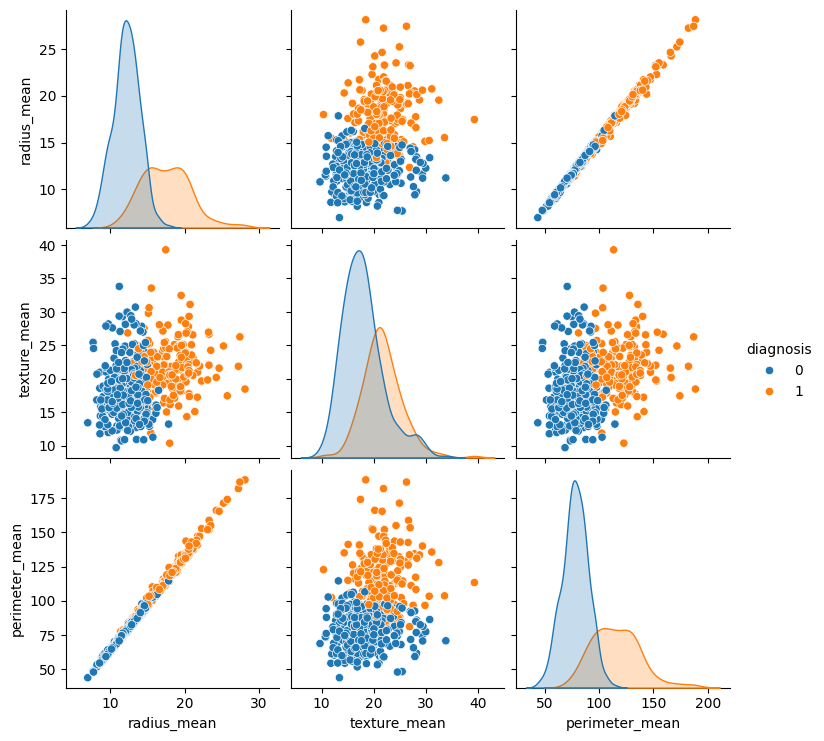

In [26]:
#Create a pair plot
sns.pairplot(df.iloc[:,1:5], hue = 'diagnosis')

In [ ]:
#Print the first 5 rows of the new data
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#Get the correlation of the columns
df.iloc[:,1:32].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


<Axes: >

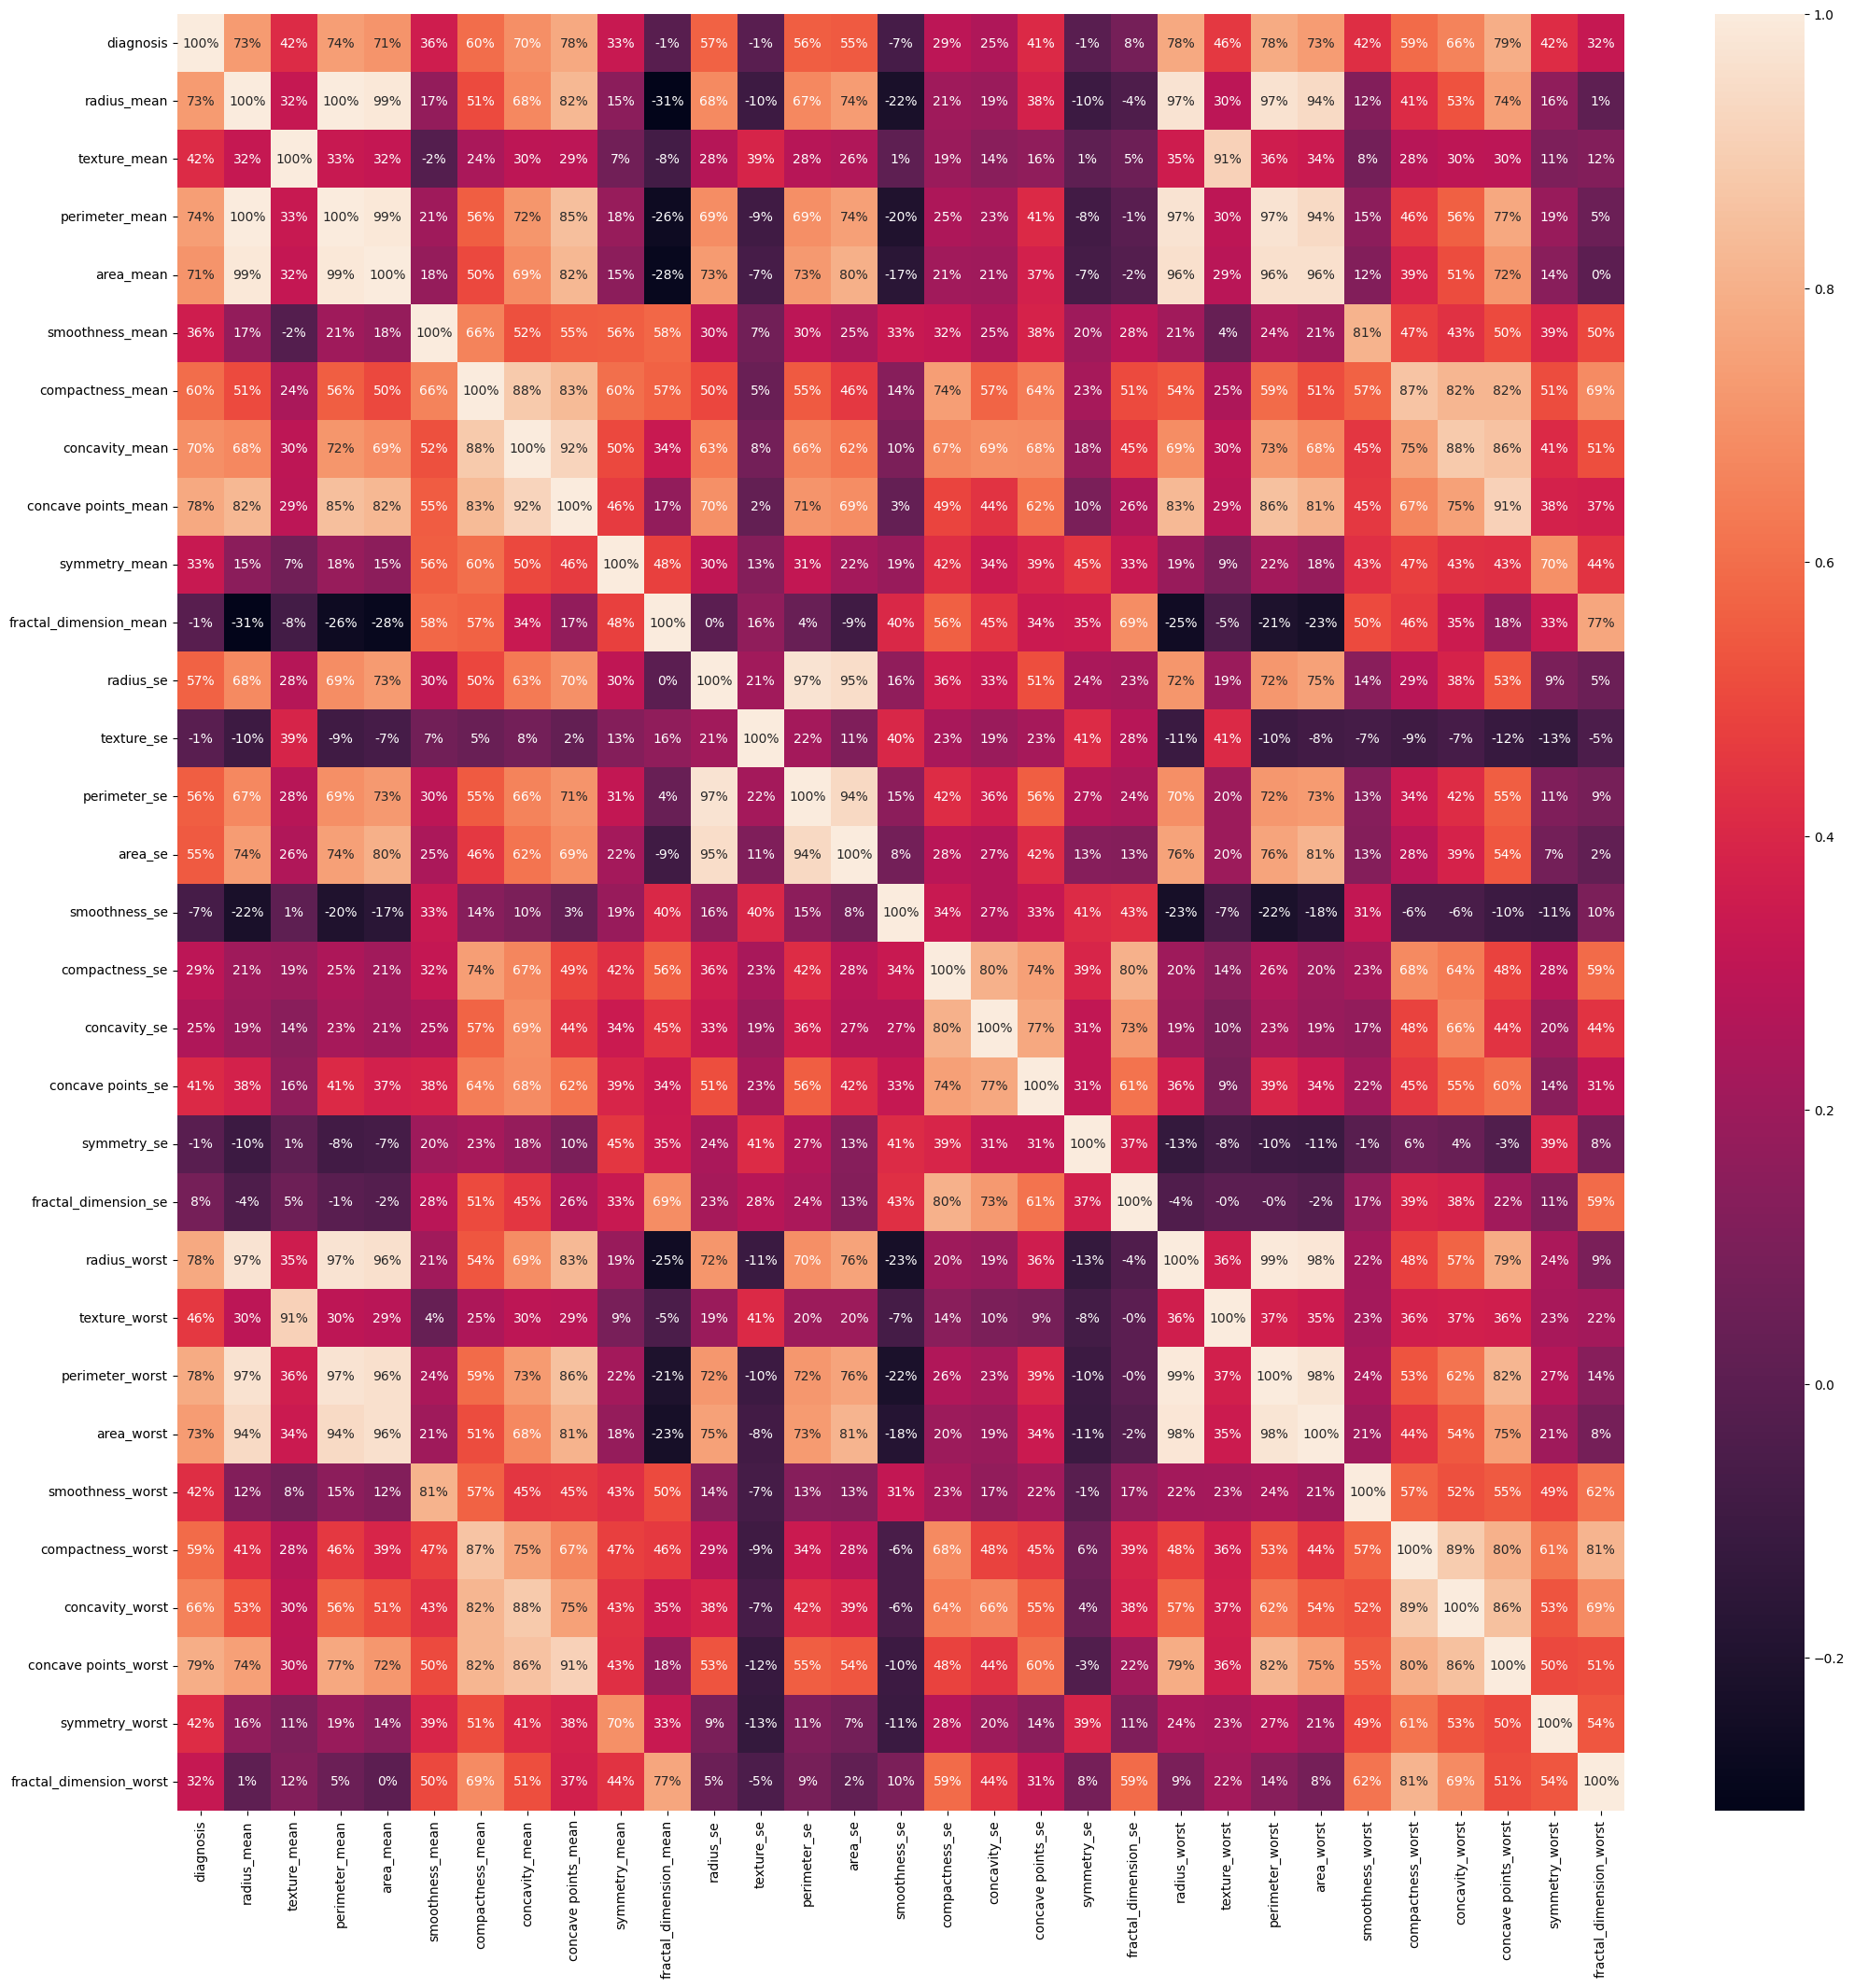

In [ ]:
#Visualize the correlation
plt.figure(figsize=(25,25))
sns.heatmap(df.iloc[:,1:32].corr(), annot=True,fmt='.0%')

In [ ]:
#A new version to train model one by one and try to show result in a table
X = df.iloc[:,2:31]
y = df.iloc[:,1]
y = np.ravel(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

Explained variation per principal component: [0.98204467 0.01617649]


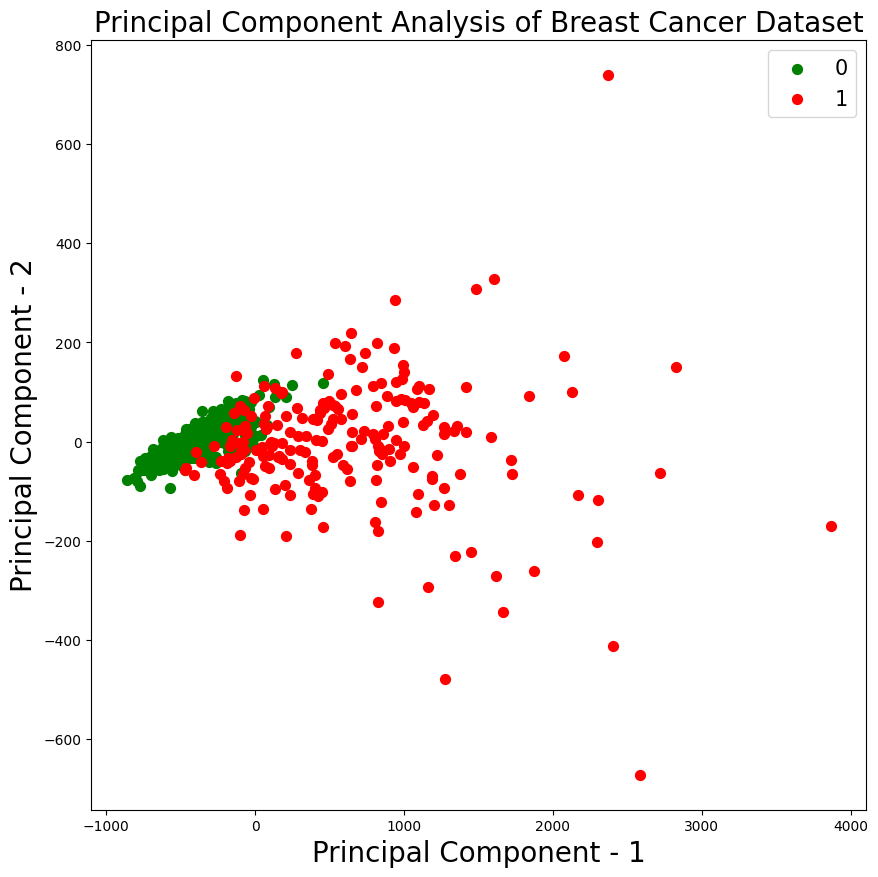

In [ ]:
#PCA Data Visuliaztion
from sklearn.decomposition import PCA

pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(X)
principal_breast_Df = pd.DataFrame(data=principalComponents_breast, columns=['principal component 1', 'principal component 2'])
principal_breast_Df.tail()

print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))

plt.figure(figsize=(10,10))
plt.xlabel('Principal Component - 1', fontsize=20)
plt.ylabel('Principal Component - 2', fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset", fontsize=20)
targets = [0, 1]
colors = ['g', 'r']

for target, color in zip(targets, colors):
    indicesToKeep = df['diagnosis'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'principal component 1'],
                principal_breast_Df.loc[indicesToKeep, 'principal component 2'],
                c=color, s=50)

plt.legend(targets, prop={'size': 15})
plt.show()

From the above graph, you can observe that the two classes benign and malignant, when projected to a two-dimensional space, can be linearly separable up to some extent. Other observations can be that the benign class is spread out as compared to the malignant class.

Ridge Regression MSE, alpha = 0.1:  0.06471395818583989
[-3.97309002e-02  1.33939349e-02 -1.01200286e-02  6.66237560e-04
  3.72958023e-01 -8.74219546e-01  3.88615587e-01  8.73592717e-01
  4.97397770e-01 -3.65082009e-02  4.75574446e-01  4.56353243e-02
 -2.42960031e-02 -5.57153792e-04  2.01163629e-01 -5.22387769e-01
 -1.45697791e+00  4.60568722e-02  1.06899908e-01 -9.49276892e-02
  1.99162542e-01 -3.43259734e-04  3.15470319e-04 -1.16848011e-03
  1.07770408e+00  2.68071615e-03  4.73522520e-01  1.26297036e+00
  4.59533331e-01]
Ridge Regression MSE, alpha = 1:  0.06539676246959285
[-1.56135250e-01  6.06985331e-03  9.11864182e-04  9.48284152e-04
  1.61115454e-01 -2.97544089e-02  1.61604921e-01  2.43588075e-01
  2.23680790e-01  6.53518000e-03  2.28750019e-01  3.79970331e-02
 -1.26913944e-02  1.72693139e-04  3.14014624e-02 -1.33647084e-01
 -2.79249384e-01  8.34227051e-03  2.82440742e-02 -2.06942061e-02
  2.62267056e-01  5.24611682e-03 -1.16722037e-03 -1.42609006e-03
  3.14818202e-01  7.6650585

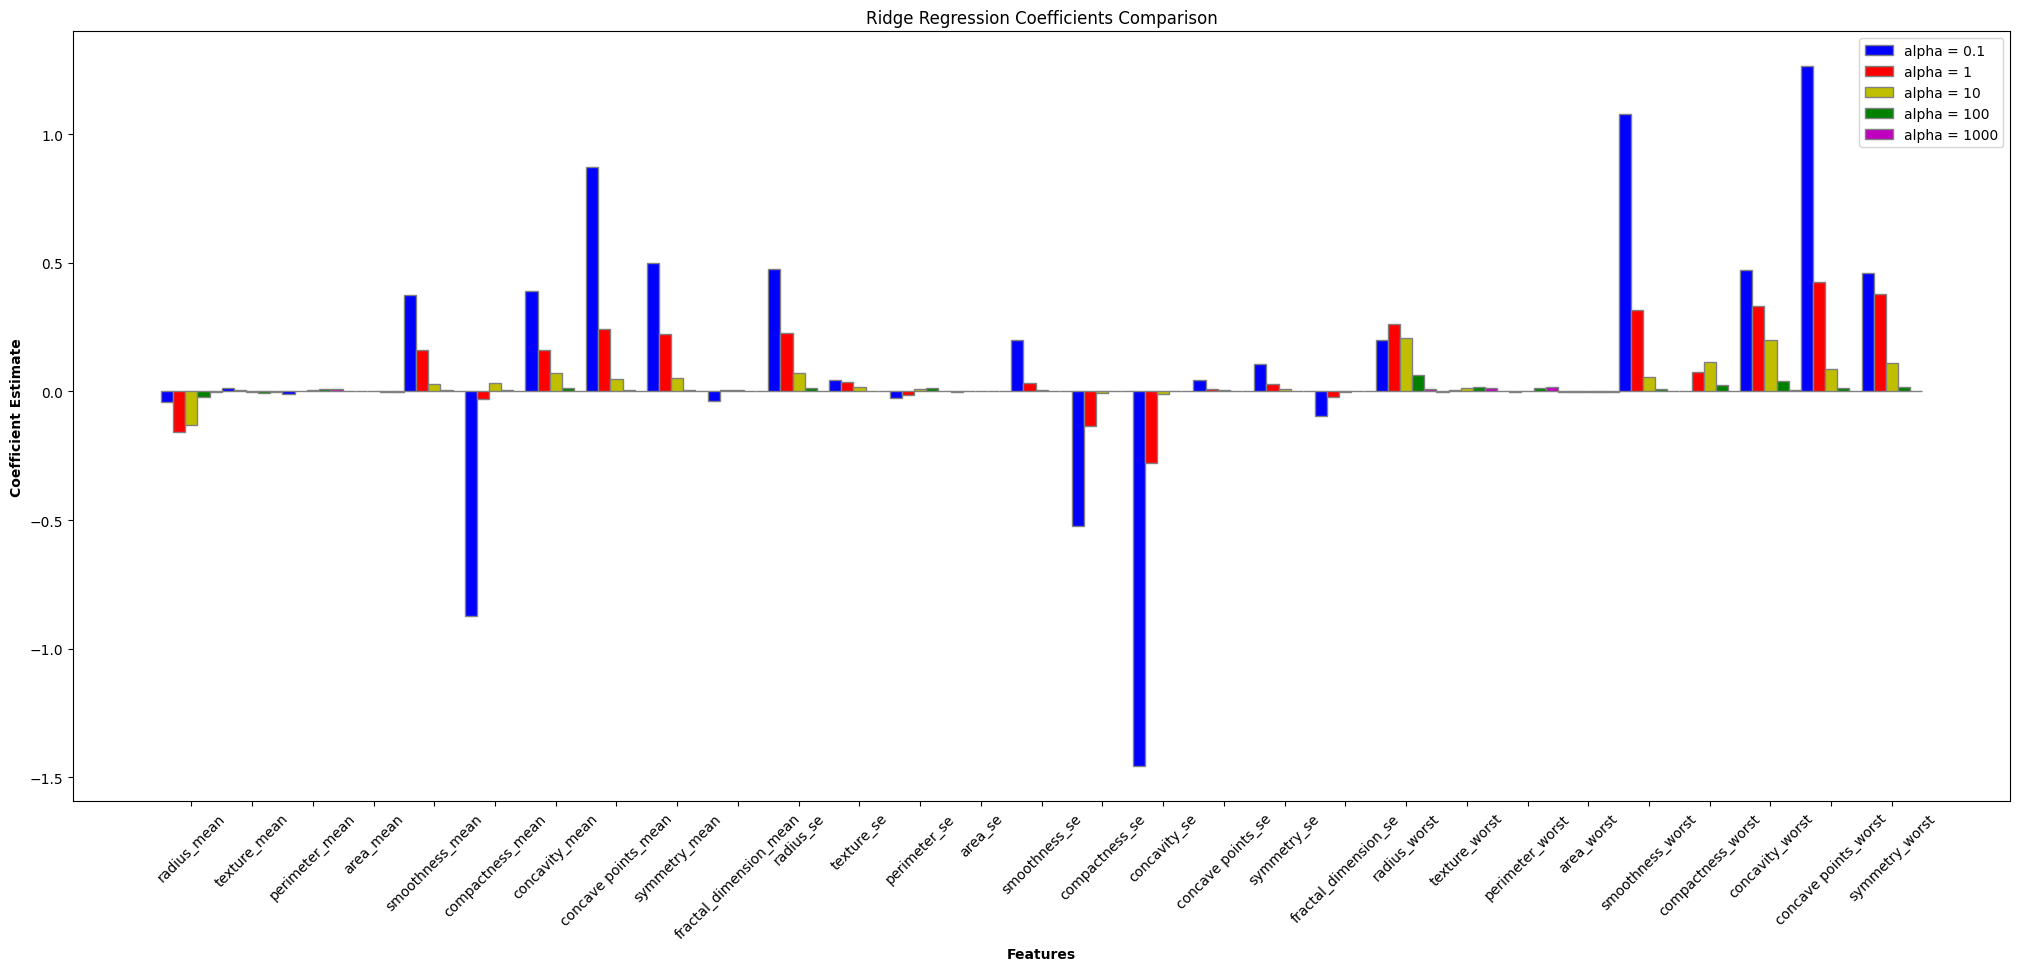

In [ ]:
#Ridge Regression
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
barWidth = 0.2

#Ridge Regression, alpha = 0.1
ridgeR01 = Ridge(alpha = 0.1)
ridgeR01.fit(X_train, y_train)
y_pred01 = ridgeR01.predict(X_test)
#calculate mean square error
mean_squared_error_ridge01 = np.mean((y_pred01 - y_test)**2)
print("Ridge Regression MSE, alpha = 0.1: ", mean_squared_error_ridge01)
#Ridge Regression: Larger absolute values of coefficients indicate features that have more influence on the target variable, assuming all features are on the same scale.
print(ridgeR01.coef_)

#Ridge Regression, alpha = 1
ridgeR1 = Ridge(alpha = 1)
ridgeR1.fit(X_train, y_train)
y_pred1 = ridgeR1.predict(X_test)
#calculate mean square error
mean_squared_error_ridge1 = np.mean((y_pred1 - y_test)**2)
print("Ridge Regression MSE, alpha = 1: ", mean_squared_error_ridge1)
print(ridgeR1.coef_)

#Ridge Regression, alpha = 10
ridgeR10 = Ridge(alpha = 10)
ridgeR10.fit(X_train, y_train)
y_pred10 = ridgeR10.predict(X_test)
#calculate mean square error
mean_squared_error_ridge10 = np.mean((y_pred10 - y_test)**2)
print("Ridge Regression MSE, alpha = 10: ", mean_squared_error_ridge10)
print(ridgeR10.coef_)

#Ridge Regression, alpha = 100
ridgeR100 = Ridge(alpha = 100)
ridgeR100.fit(X_train, y_train)
y_pred100 = ridgeR100.predict(X_test)
#calculate mean square error
mean_squared_error_ridge100 = np.mean((y_pred100 - y_test)**2)
print("Ridge Regression MSE, alpha = 100: ", mean_squared_error_ridge100)
print(ridgeR100.coef_)

#Ridge Regression, alpha = 1000
ridgeR1000 = Ridge(alpha = 1000)
ridgeR1000.fit(X_train, y_train)
y_pred1000 = ridgeR1000.predict(X_test)
#calculate mean square error
mean_squared_error_ridge1000 = np.mean((y_pred1000 - y_test)**2)
print("Ridge Regression MSE, alpha = 1000: ", mean_squared_error_ridge1000)
print(ridgeR1000.coef_)

#get ridge coefficient and print them
ridge_coefficient = pd.DataFrame()
ridge_coefficient["Columns"]= X_train.columns
ridge_coefficient['Ridge Coefficient Estimate 0.1'] = pd.Series(ridgeR01.coef_)
ridge_coefficient['Ridge Coefficient Estimate 1'] = pd.Series(ridgeR1.coef_)
ridge_coefficient['Ridge Coefficient Estimate 10'] = pd.Series(ridgeR10.coef_)
ridge_coefficient['Ridge Coefficient Estimate 100'] = pd.Series(ridgeR100.coef_)
ridge_coefficient['Ridge Coefficient Estimate 1000'] = pd.Series(ridgeR1000.coef_)

# Set position of bar on X axis
r1 = np.arange(len(ridge_coefficient["Columns"]))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

# Make the plot
plt.figure(figsize=(25, 10))
plt.bar(r1, ridge_coefficient['Ridge Coefficient Estimate 0.1'], color='b', width=barWidth, edgecolor='grey', label='alpha = 0.1')
plt.bar(r2, ridge_coefficient['Ridge Coefficient Estimate 1'], color='r', width=barWidth, edgecolor='grey', label='alpha = 1')
plt.bar(r3, ridge_coefficient['Ridge Coefficient Estimate 10'], color='y', width=barWidth, edgecolor='grey', label='alpha = 10')
plt.bar(r4, ridge_coefficient['Ridge Coefficient Estimate 100'], color='g', width=barWidth, edgecolor='grey', label='alpha = 100')
plt.bar(r5, ridge_coefficient['Ridge Coefficient Estimate 1000'], color='m', width=barWidth, edgecolor='grey', label='alpha = 1000')

# Add xticks on the middle of the group bars
plt.xlabel('Features', fontweight='bold')
plt.ylabel('Coefficient Estimate', fontweight='bold')
# Calculate the position for the group labels (centered)
xtickPos = [(a+b+c+d+e)/5 for (a,b,c,d,e) in zip(r1, r2, r3, r4, r5)]
plt.xticks(xtickPos, ridge_coefficient["Columns"], rotation=45)
plt.title('Ridge Regression Coefficients Comparison')

# Create legend & Show graphic
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.161e+01, tolerance: 9.965e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.246e+01, tolerance: 9.965e-03
  model = cd_fast.enet_coordinate_descent(


Lasso Regression MSE, alpha = 0.0001:  0.06448921670402041
[-3.45316225e-02  1.53950594e-02 -1.18434943e-03  1.74172405e-04
  0.00000000e+00 -2.16653718e+00  7.76308207e-01  1.12392244e+00
  5.31798477e-01  0.00000000e+00  5.86948764e-01  4.38679814e-02
 -1.30833599e-02 -1.42209111e-03  0.00000000e+00 -0.00000000e+00
 -2.49059485e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  1.59280839e-01 -2.25471323e-03 -1.86951798e-03 -8.55319794e-04
  1.84181853e+00  4.94788286e-02  5.34137852e-01  1.62341352e+00
  4.72407880e-01]
Lasso Regression MSE, alpha = 0.001:  0.06550179565779707
[-1.20724831e-01  4.45674748e-03  2.61908098e-03  5.77867286e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.20187631e-01  3.13041182e-02
  8.34588667e-03  1.69374580e-04  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  2.41000814e-01  7.07783478e-03 -3.39544416e-03 -1.19891163e-03
  0.00000000e+00  0.

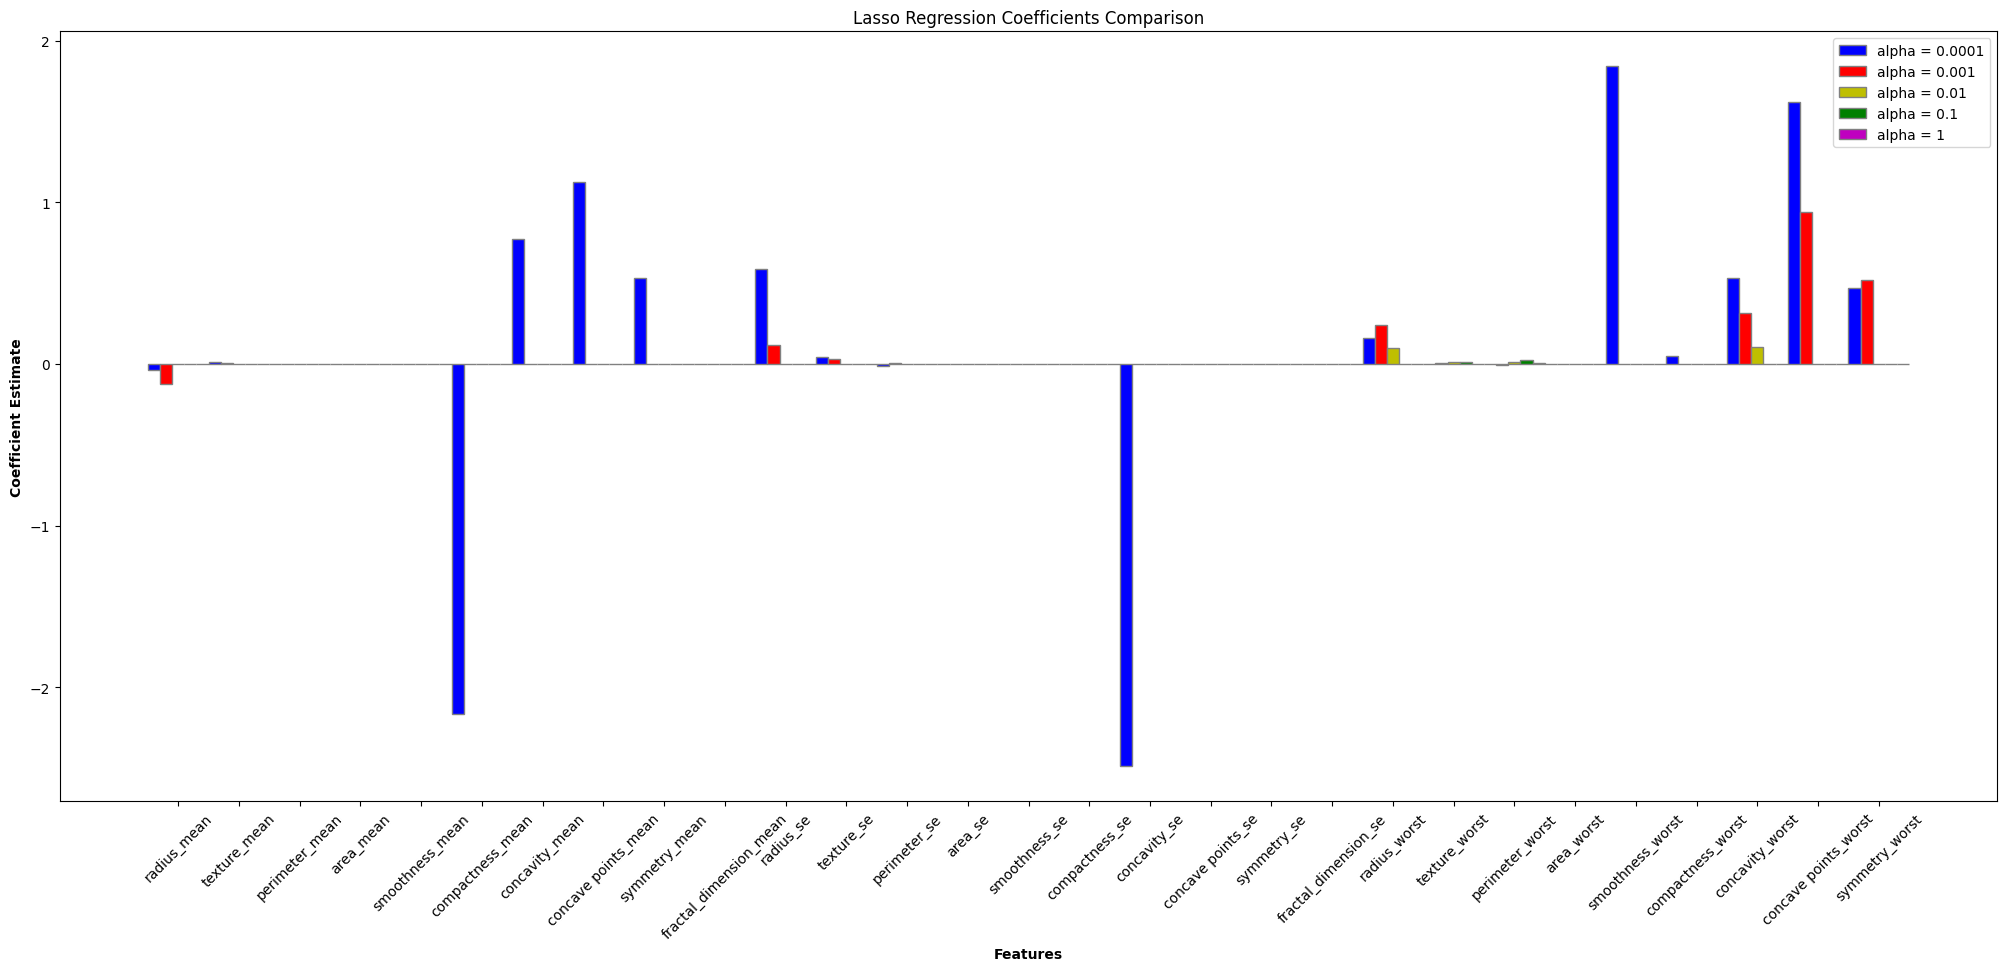

In [ ]:
#Lasso Regression
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
barWidth = 0.2

#Lasso Regression, alpha = 0.0001
lassoR00001 = Lasso(alpha = 0.0001)
lassoR00001.fit(X_train, y_train)
y_pred00001 = lassoR00001.predict(X_test)
#calculate mean square error
mean_squared_error_lassoR00001 = np.mean((y_pred00001 - y_test)**2)
print("Lasso Regression MSE, alpha = 0.0001: ", mean_squared_error_lassoR00001)
#Lasso Regression: examine the coefficients to see which features have been retained (non-zero coefficients) and which have been removed (coefficients are zero).
print(lassoR00001.coef_)

#Lasso Regression, alpha = 0.001
lassoR0001 = Lasso(alpha = 0.001)
lassoR0001.fit(X_train, y_train)
y_pred0001 = lassoR0001.predict(X_test)
#calculate mean square error
mean_squared_error_lassoR0001 = np.mean((y_pred0001 - y_test)**2)
print("Lasso Regression MSE, alpha = 0.001: ", mean_squared_error_lassoR0001)
print(lassoR0001.coef_)

#Lasso Regression, alpha = 0.01
lassoR001 = Lasso(alpha = 0.01)
lassoR001.fit(X_train, y_train)
y_pred001 = lassoR001.predict(X_test)
#calculate mean square error
mean_squared_error_lassoR001 = np.mean((y_pred001 - y_test)**2)
print("Lasso Regression MSE, alpha = 0.01: ", mean_squared_error_lassoR001)
print(lassoR001.coef_)

#Lasso Regression, alpha = 0.1
lassoR01 = Lasso(alpha = 0.1)
lassoR01.fit(X_train, y_train)
y_pred01 = lassoR01.predict(X_test)
#calculate mean square error
mean_squared_error_lassoR01 = np.mean((y_pred01 - y_test)**2)
print("Lasso Regression MSE, alpha = 0.1: ", mean_squared_error_lassoR01)
print(lassoR01.coef_)

#Lasso Regression, alpha = 1
lassoR1 = Lasso(alpha = 1)
lassoR1.fit(X_train, y_train)
y_pred1 = lassoR1.predict(X_test)
#calculate mean square error
mean_squared_error_lassoR1 = np.mean((y_pred1 - y_test)**2)
print("Lasso Regression MSE, alpha = 1: ", mean_squared_error_lassoR1)
print(lassoR1.coef_)

#get ridge coefficient and print them
ridge_coefficient = pd.DataFrame()
ridge_coefficient["Columns"]= X_train.columns
ridge_coefficient['Lasso Coefficient Estimate 0.0001'] = pd.Series(lassoR00001.coef_)
ridge_coefficient['Lasso Coefficient Estimate 0.001'] = pd.Series(lassoR0001.coef_)
ridge_coefficient['Lasso Coefficient Estimate 0.01'] = pd.Series(lassoR001.coef_)
ridge_coefficient['Lasso Coefficient Estimate 0.1'] = pd.Series(lassoR01.coef_)
ridge_coefficient['Lasso Coefficient Estimate 1'] = pd.Series(lassoR1.coef_)


# Set position of bar on X axis
l1 = np.arange(len(ridge_coefficient["Columns"]))
l2 = [x + barWidth for x in l1]
l3 = [x + barWidth for x in l2]
l4 = [x + barWidth for x in l3]
l5 = [x + barWidth for x in l4]

# Make the plot
plt.figure(figsize=(25, 10))
plt.bar(l1, ridge_coefficient['Lasso Coefficient Estimate 0.0001'], color='b', width=barWidth, edgecolor='grey', label='alpha = 0.0001')
plt.bar(l2, ridge_coefficient['Lasso Coefficient Estimate 0.001'], color='r', width=barWidth, edgecolor='grey', label='alpha = 0.001')
plt.bar(l3, ridge_coefficient['Lasso Coefficient Estimate 0.01'], color='y', width=barWidth, edgecolor='grey', label='alpha = 0.01')
plt.bar(l4, ridge_coefficient['Lasso Coefficient Estimate 0.1'], color='g', width=barWidth, edgecolor='grey', label='alpha = 0.1')
plt.bar(l5, ridge_coefficient['Lasso Coefficient Estimate 1'], color='m', width=barWidth, edgecolor='grey', label='alpha = 1')

# Add xticks on the middle of the group bars
plt.xlabel('Features', fontweight='bold')
plt.ylabel('Coefficient Estimate', fontweight='bold')
# Calculate the position for the group labels (centered)
xtickPos = [(a+b+c+d+e)/5 for (a,b,c,d,e) in zip(l1, l2, l3, l4, l5)]
plt.xticks(xtickPos, ridge_coefficient["Columns"], rotation=45)
plt.title('Lasso Regression Coefficients Comparison')

# Create legend & Show graphic
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import time

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
start_time = time.time()

from sklearn.preprocessing import StandardScaler
#data scaler to converge
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logistic = LogisticRegression().fit(X_train_scaled, y_train)

#train
logistic_train = logistic.predict(X_train_scaled)
logistic_train_score = accuracy_score(y_train, logistic_train)*100

#test
logistic_test = logistic.predict(X_test_scaled)
logistic_test_score = accuracy_score(y_test, logistic_test)*100

end_time = time.time()
time_taken = end_time - start_time

#recall
logistic_recall = recall_score(y_test, logistic_test, average='weighted')*100

#Precision
logistic_precision = precision_score(y_test, logistic_test, average='weighted')*100

#F1 score
logistic_f1 = f1_score(y_test, logistic_test, average='weighted')*100

logistic = ['Logistic Regression']
logistic.append(logistic_train_score)
logistic.append(logistic_test_score)
logistic.append(logistic_recall)
logistic.append(logistic_precision)
logistic.append(logistic_f1)
logistic.append(time_taken)

# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 6))
# plt.plot(logistic.coef_.flatten())
# plt.title('Logistic Regression Coefficients Convergence')
# plt.xlabel('Coefficient Index')
# plt.ylabel('Coefficient Value')
# plt.grid(True)
# plt.show()
# print(logistic.coef_)
# print(X)

In [ ]:
#Decision Tree Classifer
from sklearn.tree import DecisionTreeClassifier
start_time = time.time()

tree = DecisionTreeClassifier().fit(X_train, y_train)

#train
tree_train = tree.predict(X_train)
tree_train_score = accuracy_score(y_train, tree_train)*100

#test
tree_test = tree.predict(X_test)
tree_test_score = accuracy_score(y_test, tree_test)*100

end_time = time.time()
time_taken = end_time - start_time

#recall
tree_recall = recall_score(y_test, tree_test, average='weighted')*100

#Precision
tree_precision = precision_score(y_test, tree_test, average='weighted')*100

#F1 score
tree_f1 = f1_score(y_test, tree_test, average='weighted')*100

tree = ['Decision Tree Classifer']
tree.append(tree_train_score)
tree.append(tree_test_score)
tree.append(tree_recall)
tree.append(tree_precision)
tree.append(tree_f1)
tree.append(time_taken)

In [ ]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
start_time = time.time()

forest = RandomForestClassifier(max_depth=5, n_estimators=5, random_state=42).fit(X_train, y_train)

#train
forest_train = forest.predict(X_train)
forest_train_score = accuracy_score(y_train, forest_train)*100

#test
forest_test = forest.predict(X_test)
forest_test_score = accuracy_score(y_test, forest_test)*100

end_time = time.time()
time_taken = end_time - start_time

#recall
forest_recall = recall_score(y_test, forest_test, average='weighted')*100

#Precision
forest_precision = precision_score(y_test, forest_test, average='weighted')*100

#F1 score
forest_f1 = f1_score(y_test, forest_test, average='weighted')*100

forest = ['Random Forest Classifer']
forest.append(forest_train_score)
forest.append(forest_test_score)
forest.append(forest_recall)
forest.append(forest_precision)
forest.append(forest_f1)
forest.append(time_taken)

In [ ]:
#k-Nearest Neighbors 3
from sklearn.neighbors import KNeighborsClassifier
start_time = time.time()

k=3
k3 = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)

#train
k3_train = k3.predict(X_train)
k3_train_score = accuracy_score(y_train, k3_train)*100

#Test
k3_test = k3.predict(X_test)
k3_test_score = accuracy_score(y_test, k3_test)*100

end_time = time.time()
time_taken = end_time - start_time

#recall
k3_recall = recall_score(y_test, k3_test, average='weighted')*100

#Precision
k3_precision = precision_score(y_test, k3_test, average='weighted')*100

#F1 score
k3_f1 = f1_score(y_test, k3_test, average='weighted')*100

k3 = ['k-Nearest Neighbors 3']
k3.append(k3_train_score)
k3.append(k3_test_score)
k3.append(k3_recall)
k3.append(k3_precision)
k3.append(k3_f1)
k3.append(time_taken)

In [ ]:
#k-Nearest Neighbors 5
from sklearn.neighbors import KNeighborsClassifier
start_time = time.time()

k=5
k5 = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)

#train
k5_train = k5.predict(X_train)
k5_train_score = accuracy_score(y_train, k5_train)*100

#Test
k5_test = k5.predict(X_test)
k5_test_score = accuracy_score(y_test, k5_test)*100

end_time = time.time()
time_taken = end_time - start_time

#recall
k5_recall = recall_score(y_test, k5_test, average='weighted')*100

#Precision
k5_precision = precision_score(y_test, k5_test, average='weighted')*100

#F1 score
k5_f1 = f1_score(y_test, k5_test, average='weighted')*100

k5 = ['k-Nearest Neighbors 5']
k5.append(k5_train_score)
k5.append(k5_test_score)
k5.append(k5_recall)
k5.append(k5_precision)
k5.append(k5_f1)
k5.append(time_taken)

In [ ]:
#k-Nearest Neighbors 7
from sklearn.neighbors import KNeighborsClassifier
start_time = time.time()

k=7
k7 = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)

#train
k7_train = k7.predict(X_train)
k7_train_score = accuracy_score(y_train, k7_train)*100

#Test
k7_test = k7.predict(X_test)
k7_test_score = accuracy_score(y_test, k7_test)*100

end_time = time.time()
time_taken = end_time - start_time

#recall
k7_recall = recall_score(y_test, k7_test, average='weighted')*100

#Precision
k7_precision = precision_score(y_test, k7_test, average='weighted')*100

#F1 score
k7_f1 = f1_score(y_test, k7_test, average='weighted')*100

k7 = ['k-Nearest Neighbors 7']
k7.append(k7_train_score)
k7.append(k7_test_score)
k7.append(k7_recall)
k7.append(k7_precision)
k7.append(k7_f1)
k7.append(time_taken)

In [ ]:
#k-Nearest Neighbors 9
from sklearn.neighbors import KNeighborsClassifier
start_time = time.time()

k=9
k9 = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)

#train
k9_train = k9.predict(X_train)
k9_train_score = accuracy_score(y_train, k9_train)*100

#Test
k9_test = k9.predict(X_test)
k9_test_score = accuracy_score(y_test, k9_test)*100

end_time = time.time()
time_taken = end_time - start_time

#recall
k9_recall = recall_score(y_test, k9_test, average='weighted')*100

#Precision
k9_precision = precision_score(y_test, k9_test, average='weighted')*100

#F1 score
k9_f1 = f1_score(y_test, k9_test, average='weighted')*100

k9 = ['k-Nearest Neighbors 9']
k9.append(k9_train_score)
k9.append(k9_test_score)
k9.append(k9_recall)
k9.append(k9_precision)
k9.append(k9_f1)
k9.append(time_taken)

In [ ]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
start_time = time.time()

naive_bayes = GaussianNB().fit(X_train, y_train)

#train
naive_bayes_train = naive_bayes.predict(X_train)
naive_bayes_train_score = accuracy_score(y_train, naive_bayes_train)*100

#test
naive_bayes_test = naive_bayes.predict(X_test)
naive_bayes_test_score = accuracy_score(y_test, naive_bayes_test)*100

end_time = time.time()
time_taken = end_time - start_time

#recall
naive_bayes_recall = recall_score(y_test, naive_bayes_test, average='weighted')*100

#Precision
naive_bayes_precision = precision_score(y_test, naive_bayes_test, average='weighted')*100

#F1 score
naive_bayes_f1 = f1_score(y_test, naive_bayes_test, average='weighted')*100

naive_bayes = ['Naive Bayes']
naive_bayes.append(naive_bayes_train_score)
naive_bayes.append(naive_bayes_test_score)
naive_bayes.append(naive_bayes_recall)
naive_bayes.append(naive_bayes_precision)
naive_bayes.append(naive_bayes_f1)
naive_bayes.append(time_taken)

In [ ]:
#Boosting
from sklearn.ensemble import GradientBoostingClassifier
start_time = time.time()

boosting = GradientBoostingClassifier(max_depth=5, n_estimators=5, random_state=42).fit(X_train, y_train)

#train
boosting_train = boosting.predict(X_train)
boosting_train_score = accuracy_score(y_train, boosting_train)*100

#test
boosting_test = boosting.predict(X_test)
boosting_test_score = accuracy_score(y_test, boosting_test)*100

end_time = time.time()
time_taken = end_time - start_time

#recall
boosting_recall = recall_score(y_test, boosting_test, average='weighted')*100

#Precision
boosting_precision = precision_score(y_test, boosting_test, average='weighted')*100

#F1 score
boosting_f1 = f1_score(y_test, boosting_test, average='weighted')*100

boosting = ['Boosting']
boosting.append(boosting_train_score)
boosting.append(boosting_test_score)
boosting.append(boosting_recall)
boosting.append(boosting_precision)
boosting.append(boosting_f1)
boosting.append(time_taken)

In [ ]:
#Support Vector Machines
from sklearn.svm import SVC
start_time = time.time()

svm = SVC(random_state=42).fit(X_train, y_train)

#train
svm_train = svm.predict(X_train)
svm_train_score = accuracy_score(y_train, svm_train)*100

#test
svm_test = svm.predict(X_test)
svm_test_score = accuracy_score(y_test, svm_test)*100

end_time = time.time()
time_taken = end_time - start_time

#recall
svm_recall = recall_score(y_test, svm_test, average='weighted')*100

#Precision
svm_precision = precision_score(y_test, svm_test, average='weighted')*100

#F1 score
svm_f1 = f1_score(y_test, svm_test, average='weighted')*100

svm = ['Support Vector Machines']
svm.append(svm_train_score)
svm.append(svm_test_score)
svm.append(svm_recall)
svm.append(svm_precision)
svm.append(svm_f1)
svm.append(time_taken)

In [ ]:
#Clustering preprocessing data set
from sklearn.preprocessing import StandardScaler
data = df.drop('id', axis=1)
X = StandardScaler().fit_transform(X)

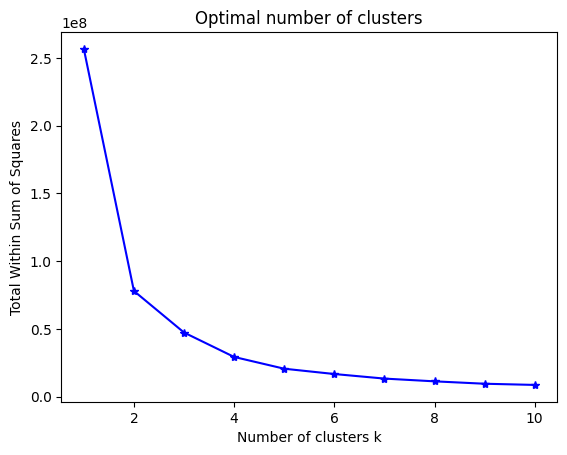

In [ ]:
#KMeans Clustering
#Optimal number of clusters
from sklearn.cluster import KMeans
wss = []

K = range(1,11)
for k in K:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=123)
    kmeans = kmeans.fit(data)
    wss.append(kmeans.inertia_)
plt.plot(K, wss, "b*-")
plt.xlabel("Number of clusters k")
plt.ylabel("Total Within Sum of Squares")
plt.title("Optimal number of clusters")
plt.show()
#there is a kink at k=2, hence k=2 can be considered a good number of the cluster to cluster this data

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, pairwise_distances, adjusted_rand_score, normalized_mutual_info_score

486 out of 569 samples were correctly labeled.
KMeans Accuracy Score is:  0.8541300527240774
KMeans Silhouette Score is:  0.6972643037728601
KMeans Davies-Bouldin Index is:  0.5044037959937963
KMeans Calinski-Harabasz Index is:  1300.2075740879543
KMeans Adjusted Rand Index is:  0.49142453622455523
KMeans Normalized Mutual Information is:  0.46479332792160793


Text(0.5, 1.0, 'KMeans clustering plot')

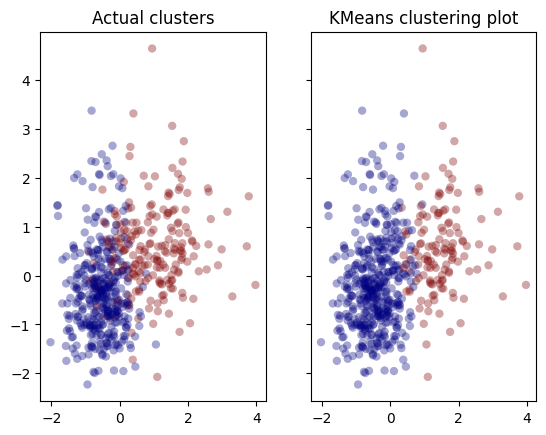

In [ ]:
#KMeans Clustering  k=2 i.e. either Malignant or Benign
from sklearn import metrics
start_time = time.time()

km = KMeans(n_clusters=2, init="k-means++", n_init='auto')
km_pred = km.fit_predict(data)

end_time = time.time()
time_taken = end_time - start_time

#Check how many of the samples were correctly labeled
labels = km.labels_
correct_labels = sum(y == labels)
km_acc = correct_labels/float(y.size)
print("%d out of %d samples were correctly labeled." % (correct_labels, y.size))
print("KMeans Accuracy Score is: ", km_acc)

#Internal Metrics:
#Silhouette Score
km_ss = silhouette_score(data, km_pred)
print("KMeans Silhouette Score is: ", km_ss)

#Davies-Bouldin Index (DBI)
km_dbi = davies_bouldin_score(data, km_pred)
print("KMeans Davies-Bouldin Index is: ", km_dbi)

#Calinski-Harabasz Index (CHI)
km_chi = metrics.calinski_harabasz_score(data, km_pred)
print("KMeans Calinski-Harabasz Index is: ", km_chi)

#External Metrics:
#Adjusted Rand Index (ARI)
km_ari = adjusted_rand_score(data["diagnosis"], km_pred)
print("KMeans Adjusted Rand Index is: ", km_ari)

#Normalized Mutual Information (NMI)
km_nmi = normalized_mutual_info_score(data["diagnosis"], km_pred)
print("KMeans Normalized Mutual Information is: ", km_nmi)

km = ['KMeans Clustering']
km.append(km_acc)
km.append(km_ss)
km.append(km_dbi)
km.append(km_chi)
km.append(km_ari)
km.append(km_nmi)
km.append(time_taken)

# Scatter plots
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(X[:,0], X[:,1], c=data["diagnosis"], cmap="jet", edgecolor="None", alpha=0.35)
ax1.set_title("Actual clusters")

ax2.scatter(X[:,0], X[:,1], c=km_pred, cmap="jet", edgecolor="None", alpha=0.35)
ax2.set_title("KMeans clustering plot")

443 out of 569 samples were correctly labeled.
Hierarchical Agglomerative Accuracy Score is:  0.7785588752196837
KMeans Silhouette Score is:  0.6899793200055596
KMeans Davies-Bouldin Index is:  0.4794642653331062
KMeans Calinski-Harabasz Index is:  1088.161465912142
KMeans Adjusted Rand Index is:  0.2872456066095377
KMeans Normalized Mutual Information is:  0.31908185424236946


Text(0.5, 1.0, 'Agglomeratve clustering plot')

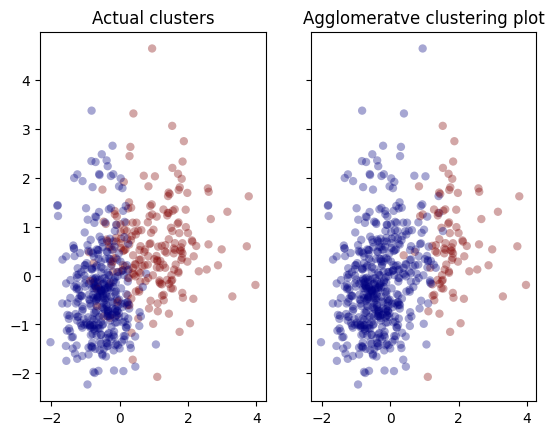

In [ ]:
#Hierarchical Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
start_time = time.time()

ha = AgglomerativeClustering(n_clusters=2, linkage="ward")
ha_pred = ha.fit_predict(data)

end_time = time.time()
time_taken = end_time - start_time

#Check how many of the samples were correctly labeled
labels = ha.labels_
correct_labels = sum(y == labels)
ha_acc = correct_labels/float(y.size)
print("%d out of %d samples were correctly labeled." % (correct_labels, y.size))
print("Hierarchical Agglomerative Accuracy Score is: ", ha_acc)

#Internal Metrics:
#Silhouette Score
ha_ss = silhouette_score(data, ha_pred)
print("KMeans Silhouette Score is: ", ha_ss)

#Davies-Bouldin Index (DBI)
ha_dbi = davies_bouldin_score(data, ha_pred)
print("KMeans Davies-Bouldin Index is: ", ha_dbi)

#Calinski-Harabasz Index (CHI)
ha_chi = metrics.calinski_harabasz_score(data, ha_pred)
print("KMeans Calinski-Harabasz Index is: ", ha_chi)

#External Metrics:
#Adjusted Rand Index (ARI)
ha_ari = adjusted_rand_score(data["diagnosis"], ha_pred)
print("KMeans Adjusted Rand Index is: ", ha_ari)

#Normalized Mutual Information (NMI)
ha_nmi = normalized_mutual_info_score(data["diagnosis"], ha_pred)
print("KMeans Normalized Mutual Information is: ", ha_nmi)

ha = ['Hierarchical Clustering']
ha.append(ha_acc)
ha.append(ha_ss)
ha.append(ha_dbi)
ha.append(ha_chi)
ha.append(ha_ari)
ha.append(ha_nmi)
ha.append(time_taken)

# Scatter plots
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(X[:,0], X[:,1], c=data["diagnosis"], cmap="jet", edgecolor="None", alpha=0.35)
ax1.set_title("Actual clusters")

ax2.scatter(X[:,0], X[:,1], c=ha_pred, cmap="jet", edgecolor="None", alpha=0.35)
ax2.set_title("Agglomeratve clustering plot")

464 out of 569 samples were correctly labeled.
Hierarchical Agglomerative Accuracy Score is:  0.8154657293497364
KMeans Silhouette Score is:  0.6204238187243394
KMeans Davies-Bouldin Index is:  0.4448975349922346
KMeans Calinski-Harabasz Index is:  442.9560530183139
KMeans Adjusted Rand Index is:  0.5117963891639629
KMeans Normalized Mutual Information is:  0.4300417524501334


Text(0.5, 1.0, 'MeanShift clustering plot')

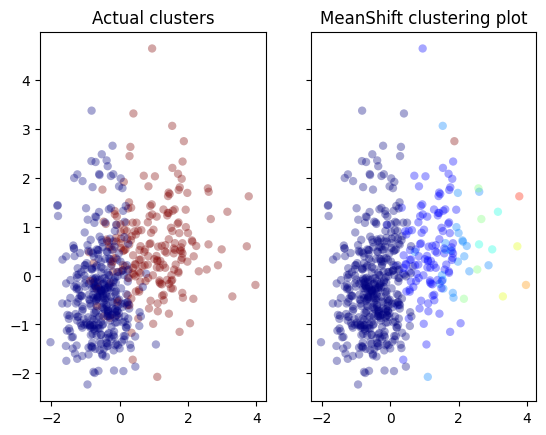

In [ ]:
#MeanShift Clustering
from sklearn.cluster import MeanShift, estimate_bandwidth
start_time = time.time()

bandwidth = estimate_bandwidth(data, quantile=0.2, n_samples=500)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms_pred = ms.fit_predict(data)

end_time = time.time()
time_taken = end_time - start_time

#Check how many of the samples were correctly labeled
labels = ms.labels_
correct_labels = sum(y == labels)
ms_acc = correct_labels/float(y.size)
print("%d out of %d samples were correctly labeled." % (correct_labels, y.size))
print("Hierarchical Agglomerative Accuracy Score is: ", ms_acc)

#Internal Metrics:
#Silhouette Score
ms_ss = silhouette_score(data, ms_pred)
print("KMeans Silhouette Score is: ", ms_ss)

#Davies-Bouldin Index (DBI)
ms_dbi = davies_bouldin_score(data, ms_pred)
print("KMeans Davies-Bouldin Index is: ", ms_dbi)

#Calinski-Harabasz Index (CHI)
ms_chi = metrics.calinski_harabasz_score(data, ms_pred)
print("KMeans Calinski-Harabasz Index is: ", ms_chi)

#External Metrics:
#Adjusted Rand Index (ARI)
ms_ari = adjusted_rand_score(data["diagnosis"], ms_pred)
print("KMeans Adjusted Rand Index is: ", ms_ari)

#Normalized Mutual Information (NMI)
ms_nmi = normalized_mutual_info_score(data["diagnosis"], ms_pred)
print("KMeans Normalized Mutual Information is: ", ms_nmi)

ms = ['MeanShift Clustering']
ms.append(ms_acc)
ms.append(ms_ss)
ms.append(ms_dbi)
ms.append(ms_chi)
ms.append(ms_ari)
ms.append(ms_nmi)
ms.append(time_taken)

# Scatter plots
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(X[:,0], X[:,1], c=data["diagnosis"], cmap="jet", edgecolor="None", alpha=0.35)
ax1.set_title("Actual clusters")

ax2.scatter(X[:,0], X[:,1], c=ms_pred, cmap="jet", edgecolor="None", alpha=0.35)
ax2.set_title("MeanShift clustering plot")

In [ ]:
header1 = ['Model', 'Train_Acc', 'Test_Acc', 'Recall', 'Precision', 'F1 score', 'Time']

header2 = ['Model', 'Accuracy', 'Silhouette Score', 'DBI', 'CHI', 'ARI', 'NMI', 'Time']

In [ ]:
rows1 = [logistic, tree, forest, k3, k5, k7, k9, naive_bayes, svm, boosting]

models_table = pd.DataFrame(rows1, columns=header1).round(2)

models_table = models_table.sort_values(['Test_Acc','Recall'], ascending=[False, False])

models_table

,Model,Train_Acc,Test_Acc,Recall,Precision,F1 score,Time
2,Random Forest Classifer,98.83,96.50,96.50,96.53,96.51,0.04
6,k-Nearest Neighbors 9,93.66,95.80,95.80,95.81,95.79,0.05
0,Logistic Regression,99.06,94.41,94.41,94.41,94.41,0.04
5,k-Nearest Neighbors 7,93.90,94.41,94.41,94.41,94.41,0.05
4,k-Nearest Neighbors 5,94.13,93.71,93.71,93.74,93.72,0.07
7,Naive Bayes,95.07,93.71,93.71,93.69,93.69,0.01
8,Support Vector Machines,90.38,93.71,93.71,94.00,93.60,0.09
9,Boosting,99.53,93.71,93.71,94.05,93.76,0.15
1,Decision Tree Classifer,100.00,92.31,92.31,92.92,92.39,0.02
3,k-Nearest Neighbors 3,95.77,92.31,92.31,92.35,92.32,0.10


In [ ]:
rows2 = [km, ha, ms]

models_table = pd.DataFrame(rows2, columns=header2).round(2)

models_table = models_table.sort_values(['Silhouette Score'], ascending=[False])

models_table

,Model,Accuracy,Silhouette Score,DBI,CHI,ARI,NMI,Time
0,KMeans Clustering,0.85,0.70,0.50,1300.21,0.49,0.46,0.13
1,Hierarchical Clustering,0.78,0.69,0.48,1088.16,0.29,0.32,0.02
2,MeanShift Clustering,0.82,0.62,0.44,442.96,0.51,0.43,1.02


**Regression & Clustering wrong code:**

---



In [ ]:
# ##Linear Regression
# from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# start_time = time.time()

# label_encoder = LabelEncoder()
# y_train_encoded = label_encoder.fit_transform(y_train)
# y_test_encoded = label_encoder.transform(y_test)
# linear = LinearRegression().fit(X_train, y_train_encoded)

# #train
# linear_train = linear.predict(X_train)
# threshold = 0.5
# linear_train_binary = (linear_train > threshold).astype(float)
# linear_train_score = accuracy_score(y_train_encoded, linear_train_binary)*100

# #test
# linear_test = linear.predict(X_test)
# linear_test_binary = (linear_test > threshold).astype(float)
# linear_test_score = accuracy_score(y_test_encoded, linear_test_binary)*100

# end_time = time.time()
# time_taken = end_time - start_time

# #recall
# #linear_recall = recall_score(y_test_encoded, linear_test_binary, average='weighted')*100

# #Precision
# #linear_precision = precision_score(y_test_encoded, linear_test_binary, average='weighted')*100

# #F1 score
# #linear_f1 = f1_score(y_test_encoded, linear_test_binary, average='weighted')*100

# #MAE
# linear_MAE = mean_absolute_error(y_test_encoded, linear_test_binary)*100
# #MSE
# linear_MSE = mean_squared_error(y_test_encoded, linear_test_binary)*100
# #R2-score
# linear_R2 = r2_score(y_test_encoded, linear_test_binary)*100

# linear = ['Linear Regression']
# linear.append(linear_train_score)
# linear.append(linear_test_score)
# linear.append(linear_MAE)
# linear.append(linear_MSE)
# linear.append(linear_R2)
# linear.append(time_taken)

In [ ]:
# #Support Vector Regression
# from sklearn.svm import SVR
# from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# start_time = time.time()

# label_encoder = LabelEncoder()
# y_train_encoded = label_encoder.fit_transform(y_train)
# y_test_encoded = label_encoder.transform(y_test)
# svr = SVR(kernel='linear').fit(X_train, y_train_encoded)

# threshold = 0.5

# #train
# svr_train = svr.predict(X_train)
# svr_train_binary = np.where(svr_train > threshold, 1, 0)
# svr_train_score = accuracy_score(y_train_encoded, svr_train_binary)*100

# #test
# svr_test = svr.predict(X_test)
# svr_test_binary = np.where(svr_test > threshold, 1, 0)
# svr_test_score = accuracy_score(y_test_encoded, svr_test_binary)*100

# end_time = time.time()
# time_taken = end_time - start_time

# #recall
# #svr_recall = recall_score(y_test_encoded, svr_test_binary, average='weighted')*100

# #Precision
# #svr_precision = precision_score(y_test_encoded, svr_test_binary, average='weighted')*100

# #F1 score
# #svr_f1 = f1_score(y_test_encoded, svr_test_binary, average='weighted')*100

# #MAE
# svr_MAE = mean_absolute_error(y_test_encoded, svr_test_binary)*100
# #MSE
# svr_MSE = mean_squared_error(y_test_encoded, svr_test_binary)*100
# #R2-score
# svr_R2 = r2_score(y_test_encoded, svr_test_binary)*100

# svr = ['Support Vector Regression']
# svr.append(svr_train_score)
# svr.append(svr_test_score)
# svr.append(svr_MAE)
# svr.append(svr_MSE)
# svr.append(svr_R2)
# svr.append(time_taken)

In [ ]:
# #Decision Tree Regression
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# start_time = time.time()

# label_encoder = LabelEncoder()
# y_train_encoded = label_encoder.fit_transform(y_train)
# y_test_encoded = label_encoder.transform(y_test)
# treereg = DecisionTreeRegressor(max_depth=5).fit(X_train, y_train_encoded)

# threshold = 0.5

# #train
# treereg_train = treereg.predict(X_train)
# treereg_train_binary = (treereg_train > threshold).astype(float)
# treereg_train_score = accuracy_score(y_train_encoded, treereg_train_binary)*100

# #test
# treereg_test = treereg.predict(X_test)
# treereg_test_binary = (treereg_test > threshold).astype(float)
# treereg_test_score = accuracy_score(y_test_encoded, treereg_test_binary)*100

# end_time = time.time()
# time_taken = end_time - start_time

# #recall
# treereg_recall = recall_score(y_test_encoded, treereg_test_binary, average='weighted')*100

# #Precision
# treereg_precision = precision_score(y_test_encoded, treereg_test_binary, average='weighted')*100

# #F1 score
# treereg_f1 = f1_score(y_test_encoded, treereg_test_binary, average='weighted')*100

# #MAE
# treereg_MAE = mean_absolute_error(y_test_encoded, treereg_test_binary)*100
# #MSE
# treereg_MSE = mean_squared_error(y_test_encoded, treereg_test_binary)*100
# #R2-score
# treereg_R2 = r2_score(y_test_encoded, treereg_test_binary)*100

# treereg = ['Decision Tree Regression']
# treereg.append(treereg_train_score)
# treereg.append(treereg_test_score)
# treereg.append(treereg_MAE)
# treereg.append(treereg_MSE)
# treereg.append(treereg_R2)
# treereg.append(time_taken)

In [ ]:
# #K-Means Clustering
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import adjusted_rand_score

# start_time = time.time()

# kmeans = KMeans(n_clusters=2, random_state=0)

# #train
# kmeans_train = kmeans.fit_predict(X_train)
# kmeans_train_score = adjusted_rand_score(y_train, kmeans_train) * 100

# #test
# kmeans_test = kmeans.predict(X_test)
# label_encoder = LabelEncoder()
# y_test_encoded = label_encoder.fit_transform(y_test)
# kmeans_test_score = adjusted_rand_score(y_test_encoded, kmeans_test) * 100

# end_time = time.time()
# time_taken = end_time - start_time

# #recall
# kmeans_recall = recall_score(y_test_encoded, kmeans_test, average='weighted') * 100

# #Precision
# kmeans_precision = precision_score(y_test_encoded, kmeans_test, average='weighted')*100

# #F1 score
# kmeans_f1 = f1_score(y_test_encoded, kmeans_test, average='weighted')*100

# kmeans = ['K-Means Clustering']
# kmeans.append(kmeans_train_score)
# kmeans.append(kmeans_test_score)
# kmeans.append(kmeans_recall)
# kmeans.append(kmeans_precision)
# kmeans.append(kmeans_f1)
# kmeans.append(time_taken)

In [ ]:
# #Hierarchical Clustering

# #Hungarian methods
# #Clustering Matrics
# #Mutual Index
# from sklearn.cluster import AgglomerativeClustering
# from sklearn.metrics import adjusted_rand_score
# from sklearn.preprocessing import LabelEncoder
# start_time = time.time()

# # Label encoding for the target variable
# label_encoder = LabelEncoder()
# y_train_encoded = label_encoder.fit_transform(y_train)
# y_test_encoded = label_encoder.transform(y_test)

# hierarchical = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

# #train
# hierarchical_train = hierarchical.fit_predict(X_train)
# hierarchical_train_score = adjusted_rand_score(y_train_encoded, hierarchical_train)*100

# #test
# hierarchical_test = hierarchical.fit_predict(X_test)
# hierarchical_test_score = adjusted_rand_score(y_test_encoded, hierarchical_test)*100

# end_time = time.time()
# time_taken = end_time - start_time

# #recall
# hierarchical_recall = recall_score(y_test_encoded, hierarchical_test, average='weighted')*100

# #Precision
# hierarchical_precision = precision_score(y_test_encoded, hierarchical_test, average='weighted')*100

# #F1 score
# hierarchical_f1 = f1_score(y_test_encoded, hierarchical_test, average='weighted')*100

# hierarchical = ['Hierarchical Clustering']
# hierarchical.append(hierarchical_train_score)
# hierarchical.append(hierarchical_test_score)
# hierarchical.append(hierarchical_recall)
# hierarchical.append(hierarchical_precision)
# hierarchical.append(hierarchical_f1)
# hierarchical.append(time_taken)

In [ ]:
# #Mean Shift
# from sklearn.cluster import MeanShift
# from sklearn.preprocessing import LabelEncoder
# start_time = time.time()

# label_encoder = LabelEncoder()
# y_train_encoded = label_encoder.fit_transform(y_train)

# meanshift = MeanShift()

# #train
# meanshift_train = meanshift.fit_predict(X_train)
# meanshift_train_score = accuracy_score(y_train_encoded, meanshift_train)*100

# #test
# meanshift_test = meanshift.predict(X_test)
# meanshift_test_score = accuracy_score(y_test_encoded, meanshift_test)*100

# end_time = time.time()
# time_taken = end_time - start_time

# #recall
# meanshift_recall = recall_score(y_test_encoded, meanshift_test, average='weighted')*100

# #Precision
# meanshift_precision = precision_score(y_test_encoded, meanshift_test, average='weighted')*100

# #F1 score
# meanshift_f1 = f1_score(y_test_encoded, meanshift_test, average='weighted')*100

# meanshift = ['Mean Shift']
# meanshift.append(meanshift_train_score)
# meanshift.append(meanshift_test_score)
# meanshift.append(meanshift_recall)
# meanshift.append(meanshift_precision)
# meanshift.append(meanshift_f1)
# meanshift.append(time_taken)

**other code for clustering:**:


In [ ]:
# #K-Means Clustering

# #Visualize K-means
# from sklearn.decomposition import PCA
# pca = PCA()
# pca_data = pca.fit_transform(data)
# pca_data = pd.DataFrame(pca_data, columns=["pc"+str(i+1) for i in range(len(data.columns))])


# pca_data1 = pca_data[["pc1","pc2"]].copy()
# data1 = data.copy() # data1 is created, we do not want to change original data as adding the cluster column.

# kmeans = KMeans(n_clusters=4, random_state=2464063)
# data1["clusters"] = kmeans.fit_predict(data1)

# plt.scatter(pca_data1["pc1"], pca_data1["pc2"], c=data1.clusters)
# plt.title("The visualization of the clustered data")
# plt.xlabel("pc1:" + "{:.2f}".format(pca.explained_variance_ratio_[0] * 100) + " %")
# plt.ylabel("pc2:" + "{:.2f}".format(pca.explained_variance_ratio_[1] * 100) + " %")
# plt.show()

In [ ]:
# #K-Means Clustering

# #choosing the best number of clusters using the silhouette score
# from sklearn import metrics
# range_n_clusters = list(range(2,10))

# for n_clusters in range_n_clusters:
#     clusterer = KMeans(n_clusters=n_clusters)
#     preds = clusterer.fit_predict(data)
#     centers = clusterer.cluster_centers_

#     Kmeans_score = metrics.silhouette_score(data, preds)
#     print("For n_clusters = {}, silhouette score is {})".format(n_clusters, Kmeans_score))

In [ ]:
# #Hierarchical Clustering
# from scipy.cluster.hierarchy import linkage
# from scipy.cluster.hierarchy import dendrogram

# distance_matrix = linkage(X, method='complete',  metric = 'euclidean')

# fig = plt.figure(figsize =(20, 6))
# # Create a dendrogram
# dn = dendrogram(distance_matrix)
# #plt.xticks(rotation=90)
# plt.xticks([])
# # Display the dendogram
# plt.show()